In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


labels = os.listdir('../fashion_mnist_images/train')
print(labels)
files = os.listdir('../fashion_mnist_images/train/0')
print(files[:10])
print(len(files))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
['0000.png', '0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png']
6000


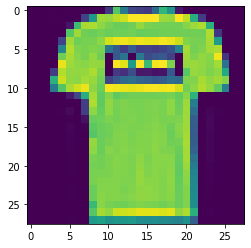

In [2]:

imageData = cv2.imread('../fashion_mnist_images/train/0/0000.png', cv2.IMREAD_UNCHANGED)
np.set_printoptions(linewidth=200)
plt.imshow(imageData)
plt.show()

In [3]:
# Loads a MNIST dataset
def loadMnistData(dataset, path):
  # Scan all the directories and create a list of labels
  labels = os.listdir(os.path.join(path, dataset))
  # Create lists for samples and labels
  X = []
  y = []
  # For each label folder
  for label in labels:
    # And for each image in given folde
    for file in os.listdir(os.path.join(path, dataset, label)):
      # Read the image
      image = cv2.imread(os.path.join(path, dataset, label, file), cv2.IMREAD_UNCHANGED)

      # And append it and a label to the lists
      X.append(image)
      
      y.append(label)
  # Convert the data to proper numpy arrays and return
  print('Data Loaded')
  return np.array(X), np.array(y).astype('uint8')

# MNIST dataset (train + test)
def createDataMnist(path):
  # Load both sets separately
  X, y = loadMnistData('train', path)
  X_test, y_test = loadMnistData('test', path)
  # And return all the data
  return X,y,X_test,y_test

In [4]:
X, y, X_test, y_test = createDataMnist('../fashion_mnist_images')

Data Loaded
Data Loaded


In [5]:
# shuffling the data so our model stop having bad practices in trianing or over fitting
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X = X[keys]
y = y[keys]

In [6]:
# Scale and reshape samples
X = (X.reshape(X.shape[0], -1).astype(np.float32) - 127.5) / 127.5
X_test = (X_test.reshape(X_test.shape[0], -1).astype(np.float32) - 127.5) / 127.5

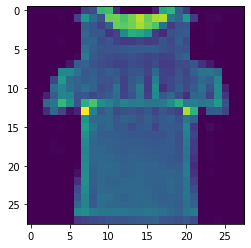

0


In [7]:
# Testing is the data Shuffled correctly
plt.imshow((X[3333].reshape(28,28)))
plt.show()
print(y[3333])

In [8]:
from Dense import Model, Layer_Dense, Activation_ReLU, Activation_Softmax, lossCateCrossEntropy, OptimizerAdam, AccuracyCategorical

In [9]:
model = Model()
model.add(Layer_Dense(X.shape[1], 128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128,128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 10))
model.add(Activation_Softmax())

# Set loss, optimizer and accuracy objects
model.set(
  loss=lossCateCrossEntropy(),
  optimizer=OptimizerAdam(decay=1e-3),
  accuracy=AccuracyCategorical()
)

model.finalize()

model.train(X, y, validation_data=(X_test, y_test), epochs=5, batchSize=128, printEvery=100)
# model.saveParameters('fashion_mnist.parms')
# model.loadParameters('fashion_mnist.parms')



epoch :1
epoch: 0, acc: 0.039, loss: 2.302835677880509, (data_loss: 2.302835677880509, reg_loss: 0), lr: 0.001
epoch: 100, acc: 0.695, loss: 0.812971620593502, (data_loss: 0.812971620593502, reg_loss: 0), lr: 0.0009090909090909091
epoch: 200, acc: 0.805, loss: 0.5999767937659344, (data_loss: 0.5999767937659344, reg_loss: 0), lr: 0.0008333333333333334
epoch: 300, acc: 0.758, loss: 0.5606027234186892, (data_loss: 0.5606027234186892, reg_loss: 0), lr: 0.0007692307692307692
epoch: 400, acc: 0.828, loss: 0.459453961021402, (data_loss: 0.459453961021402, reg_loss: 0), lr: 0.0007142857142857143
epoch: 468, acc: 0.781, loss: 0.49995052814174046, (data_loss: 0.49995052814174046, reg_loss: 0), lr: 0.000681198910081744
epoch :2
epoch: 0, acc: 0.883, loss: 0.39457531169711624, (data_loss: 0.39457531169711624, reg_loss: 0), lr: 0.0006807351940095304
epoch: 100, acc: 0.797, loss: 0.5672260802934254, (data_loss: 0.5672260802934254, reg_loss: 0), lr: 0.0006373486297004461
epoch: 200, acc: 0.844, loss:

In [10]:
model.evaluate(X_test, y_test)
# model.getParameters()


validation, acc: 0.861, loss: 0.383


[5]
Sandal


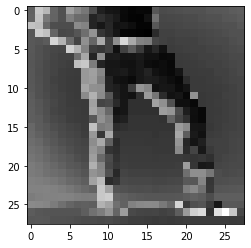

In [37]:
# model.saveParameters('fashion_mnist.parms')

# model.loadParameters('fashion_mnist.parms')

# model.save('fashion_mnist.model')
# model = Model.load('fashion_mnist.model')
fashion_mnist_labels = {
  0: 'T-shirt/top',
  1: 'Trouser',
  2: 'Pullover',
  3: 'Dress',
  4: 'Coat',
  5: 'Sandal',
  6: 'Shirt',
  7: 'Sneaker',
  8: 'Bag',
  9: 'Ankle boot'
}

imageTest = cv2.imread('pant2.jpg', cv2.IMREAD_GRAYSCALE)

imageTest = cv2.resize(imageTest, (28, 28))
imageTest = 255 - imageTest
plt.imshow(imageTest, cmap='gray')
imageTest = (imageTest.reshape(1, -1).astype(np.float32) - 127.5) / 127.5
confidences = model.predict(imageTest)
predictions = model.outputLayerActivation.predictions(confidences)
prediction = fashion_mnist_labels[predictions[0]]
print(confidences)
print(predictions)
print(prediction)
